In [14]:
import pm4py
import pandas as pd
import conformance_checker as cc
import process_discovery
import requests
import json
import utilities
import bot_parser as bp

In [15]:
def getBotInfo(endpoint="http://localhost:8080/SBFManager"):
    """
    Fetches the first bot from the social bot manager and returns its id and name
    """
    response = requests.get(f"{endpoint}/bots")
    if response.status_code == 200:
        data = json.loads(response.content)
        if len(data) == 0:
            return None
        first_value = list(data.values())[0]
        return first_value['id'], first_value['name']
    else:
        return None

In [16]:
bot_manager_endpoint = "http://localhost:8080/SBFManager"

bot_id, bot_name = getBotInfo(bot_manager_endpoint)
print("Bot ID: ", bot_id)
print("Bot Name: ", bot_name)
event_log_generator_endpoint = "http://localhost:8087"

log = utilities.fetch_event_log(bot_name, event_log_generator_endpoint)
if log is None:
    raise ValueError("Event log not found")
log.head()

Bot ID:  4b81a5ec1eed92fb09b653b0f2a91bd2b9b969cc10e18411e0de5f6938d32c7337bf313a988fe5b42a5f0ae3f887e9e81c1a39eadf50df0a5d3abd94d3cf7df9
Bot Name:  MensaBot
Fetching event log from http://localhost:8087/bot/MensaBot


parsing log, completed traces :: 100%|██████████| 5/5 [00:00<00:00, 2462.02it/s]
/Users/lakhoune/Desktop/Repos/mobsos-event-log-generator/.venv/lib/python3.11/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/Users/lakhoune/Desktop/Repos/mobsos-event-log-generator/.venv/lib/python3.11/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/Users/lakhoune/Desktop/Repos/mobsos-event-log-generator/.venv/lib/python3.11/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so ea

,EVENT,concept:name,time:timestamp,lifecycle:transition,RESOURCE,RESOURCE_TYPE,REMARKS,case:concept:name
1,USER_MESSAGE,greeting,2023-08-20 13:48:26+00:00,complete,4b81a5ec1eed92fb09b653b0f2a91bd2b9b969cc10e184...,bot,"{""user"": ""41de37a21eb0fbd7c8f2e57360ba443ce8f4...",1fc35d62-4803-47b0-bce7-37ddb2077550
5,USER_MESSAGE,help,2023-08-20 13:48:36+00:00,complete,4b81a5ec1eed92fb09b653b0f2a91bd2b9b969cc10e184...,bot,"{""user"": ""41de37a21eb0fbd7c8f2e57360ba443ce8f4...",5fe485ce-2287-4792-8072-18737eaac51c
9,USER_MESSAGE,menu,2023-08-20 13:51:11+00:00,complete,4b81a5ec1eed92fb09b653b0f2a91bd2b9b969cc10e184...,bot,"{""user"": ""41de37a21eb0fbd7c8f2e57360ba443ce8f4...",adb8dd33-b0f0-4fc2-a1c3-ec97d7571aaf
13,SERVICE_REQUEST,getMenu,2023-08-20 13:51:14+00:00,complete,4b81a5ec1eed92fb09b653b0f2a91bd2b9b969cc10e184...,bot,"{""user"": ""41de37a21eb0fbd7c8f2e57360ba443ce8f4...",adb8dd33-b0f0-4fc2-a1c3-ec97d7571aaf
15,USER_MESSAGE,number_selection,2023-08-20 13:51:21+00:00,complete,4b81a5ec1eed92fb09b653b0f2a91bd2b9b969cc10e184...,bot,"{""user"": ""41de37a21eb0fbd7c8f2e57360ba443ce8f4...",adb8dd33-b0f0-4fc2-a1c3-ec97d7571aaf


# Discovered Model

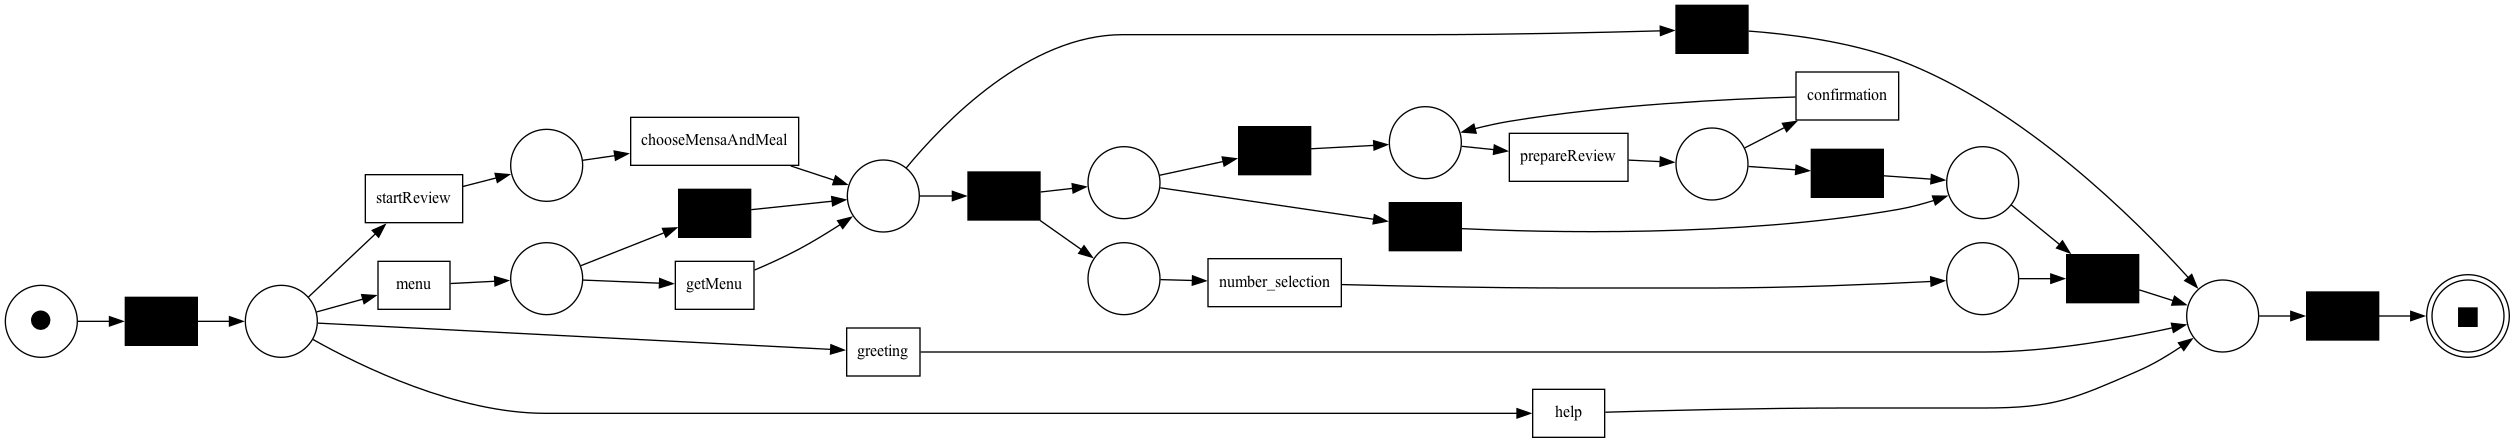

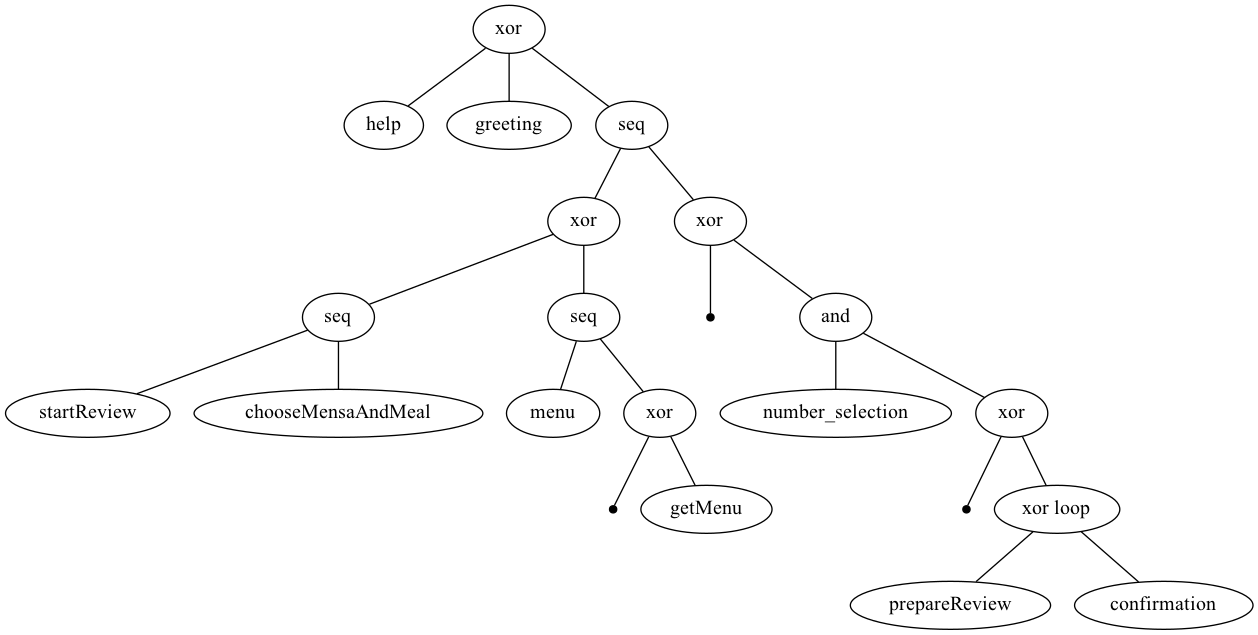

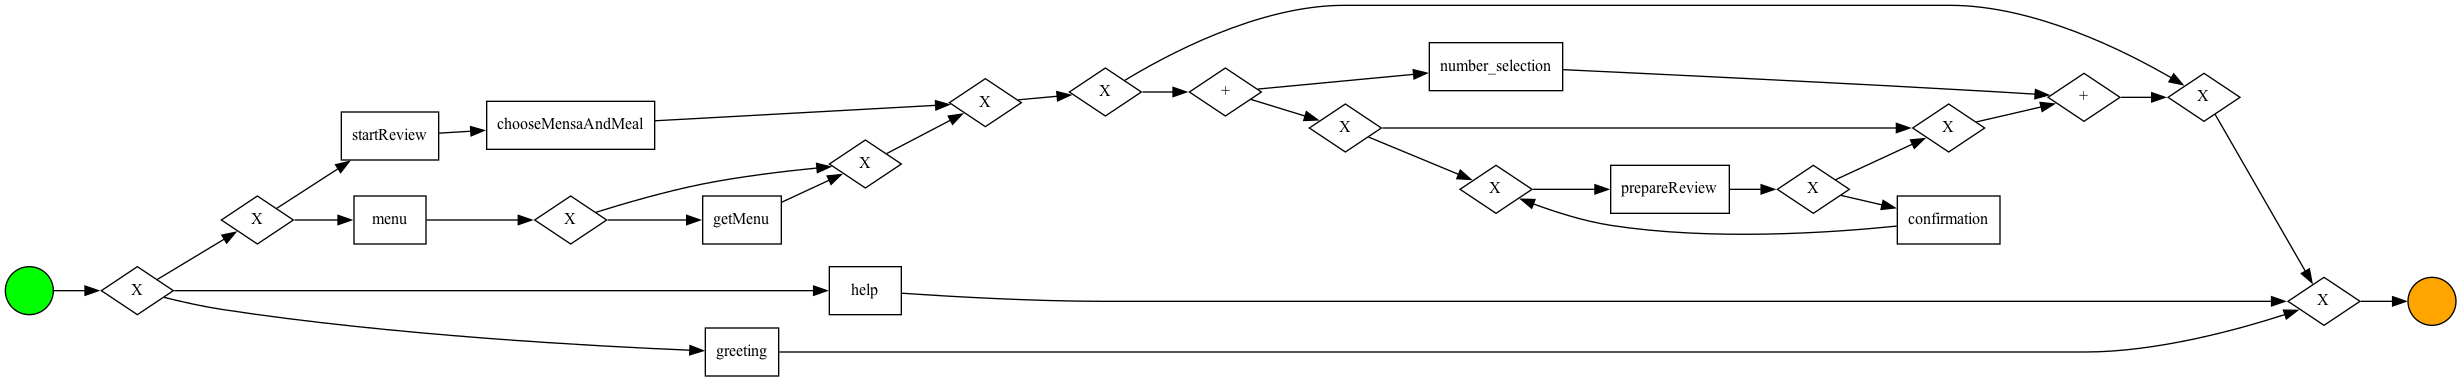

In [17]:
net,im,fm = discovery.discover_petri_net(log)
pm4py.view_petri_net(net,im,fm)
process_tree = discovery.discover_process_tree(log)
pm4py.view_process_tree(process_tree)
bpmn = discovery.discover_bpmn(log)
pm4py.view_bpmn(bpmn)

In [18]:
traces = pm4py.get_variants(log)
traces

{('greeting',): 1,
 ('help',): 1,
 ('startReview',
  'chooseMensaAndMeal',
  'prepareReview',
  'confirmation',
  'number_selection',
  'prepareReview'): 1,
 ('menu', 'getMenu', 'number_selection'): 1,
 ('menu',): 1}

# Bot Model

Fetching bot model from http://localhost:8080/SBFManager/models/MensaBot


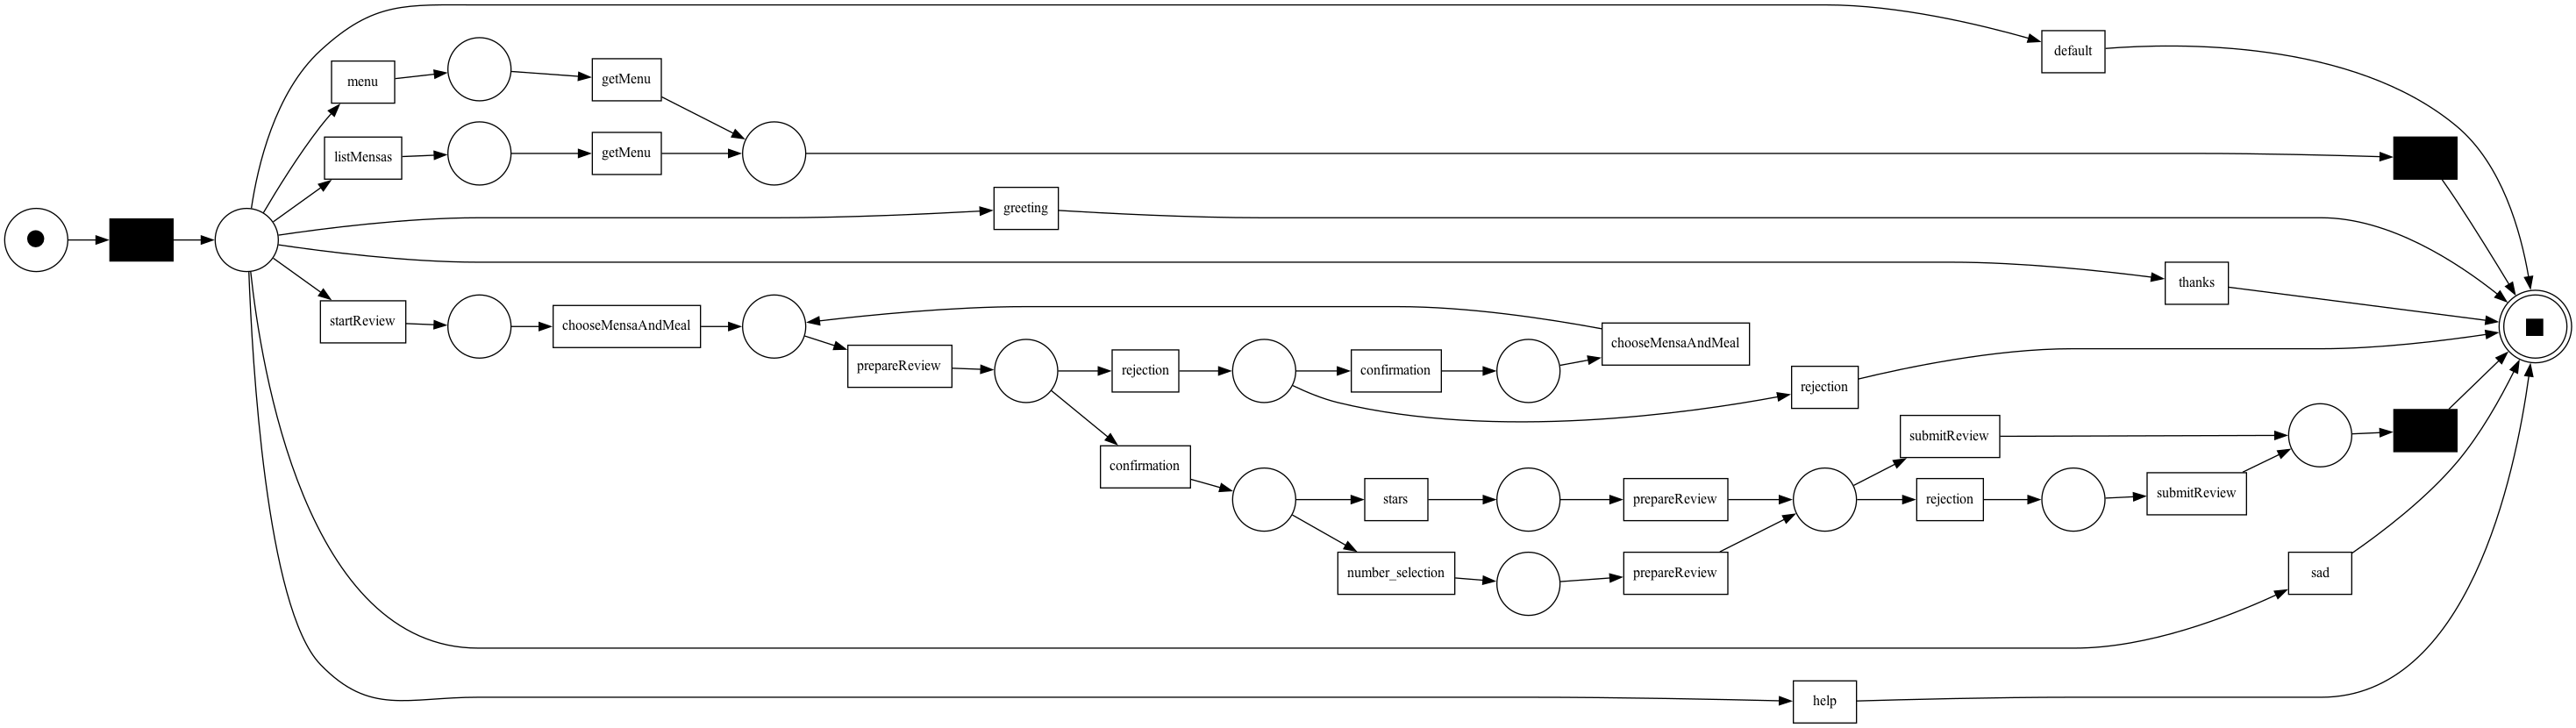

In [19]:
model = utilities.fetch_bot_model(bot_name,bot_manager_endpoint)
bot_net,bot_im,bot_fm= bp.to_petri_net(model)
bot_net=pm4py.reduce_petri_net_invisibles(bot_net)
pm4py.view_petri_net(bot_net,bot_im,bot_fm)

In [20]:
cc.find_unfitting_traces(log, bot_net, im, fm)

Exception: trying to apply alignments on a Petri net that is not a easy sound net!!